In [1]:
import pandas as pd

filename = 'Start Data/2012/RC_2012-12_gilded.csv'

data = pd.read_csv(filename)

check1 = data['gilded'].apply(lambda x: str(x).isdigit())
check2 = data['score'].apply(lambda x: str(x).isdigit())
check3 = data['ups'].apply(lambda x: str(x).isdigit())

data = data[(check1 == True)]

print 'gilded:', data['gilded'].dtype
print data['gilded'].unique()
print 'score:', data['score'].dtype
print data['score'].unique()
print 'ups:', data['ups'].dtype
print data['ups'].unique()

# data.to_csv(filename, encoding='utf-8', index=False)

gilded: int64
[ 1  2  3  7 11  5  9  4  8]
score: int64
[  24  432  216 ...,  517 1636  879]
ups: int64
[  24  432  216 ...,  517 1636  879]


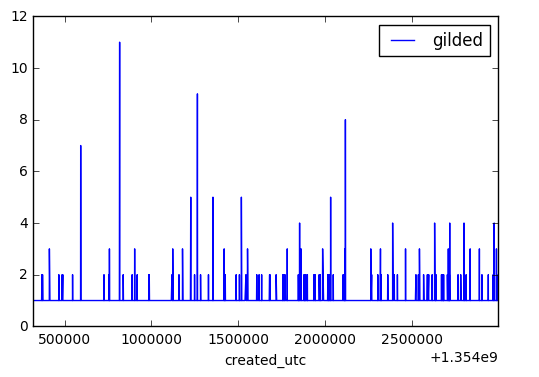

In [2]:
%matplotlib inline

filename = 'Start Data/2012/RC_2012-12_gilded.csv'

data = pd.read_csv(filename)

data.plot(x='created_utc', y='gilded', kind='line')

In [3]:
from scripts import Muger as rh
import pandas as pd
import re

# Testing function for scripts
def containsMD(body):
    heading = r'\W#{1,6}\s'
    emphasis1 = r'\*{1,2}[\s\S]+\*{1,2}'
    emphasis2 = r'_{1,2}[\s\S]+_{1,2}'
    emphasis3 = r'~~[\s\S]+~~'
    superscript = r'\w\^\w'
    unordered = r'\W[\*\-\+]\s\S'
    ordered = r'\W\d\.\s\S'
    url = r'\[[\s\S]+\]\(http[s]?://[\w/\.&=\?;\+\-]+\)'
    code = r'`[\s\S]+`'
    quote = r'(&gt;){1,2}[\s\S]+'

    return (re.search(heading, body) is not None 
       or re.search(emphasis1, body) is not None 
       or re.search(emphasis2, body) is not None
       or re.search(emphasis3, body) is not None
       or re.search(superscript, body) is not None
       or re.search(unordered, body) is not None
       or re.search(ordered, body) is not None
       or re.search(url, body) is not None
       or re.search(code, body) is not None
       or re.search(quote, body) is not None)

# Testing function for scripts
def containsTLDR(body):
    tldr = r'[tT][lL];{0,1}[dD][rR]:{0,1}\s'
    
    return (re.search(tldr, body) is not None)


filename = 'Start Data/2012/RC_2012-01_gilded.csv'

data = pd.read_csv(filename)
test = data[['body']]
test['Contains MD'] = test['body'].apply(lambda x: rh.containsMD(x))
test['Contains tldr'] = test['body'].apply(lambda x: rh.containsTLDR(x))
test
# for text in test[test['Contains tldr'] == True]['body'].values:
#     print '\n----------------------\n', text, '\n----------------------\n'

ImportError: cannot import name Muger

In [4]:
import datetime

def getTimeofDay(data):
    hour = int(datetime.datetime.fromtimestamp(data).strftime("%H"))
    print(hour)
    if hour >= 5 and hour <12:
        print(hour < 12)
        return 'Morning'
    elif hour >= 12 and hour < 17:
        return 'Afternoon'
    elif hour >= 17 and hour < 21:
        return 'Evening'
    elif hour >=21 and hour < 5:
        return 'Night'
    
print(getTimeofDay(1393632172))

18
Evening


In [21]:
from scripts import Munger as mg
import datetime
import pandas as pd

filename = 'Start Data/2015/RC_2015-01_gilded.csv'

data = pd.read_csv(filename)
temp = pd.read_csv('Start Data/2015/RC_2015-02_gilded.csv')
data = data.append(temp, ignore_index=True)
temp = pd.read_csv('Start Data/2015/RC_2015-03_gilded.csv')
data = data.append(temp, ignore_index=True)
temp = pd.read_csv('Start Data/2015/RC_2015-04_gilded.csv')
data = data.append(temp, ignore_index=True)
temp = pd.read_csv('Start Data/2015/RC_2015-05_gilded.csv')
data = data.append(temp, ignore_index=True)

data['body'] = data['body'].astype(str)

data['Contains MD'] = data['body'].apply(lambda x: mg.containsMD(x))
data['Contains tldr'] = data['body'].apply(lambda x: mg.containsTLDR(x))
data['Word Count'] = data['body'].apply(lambda x: mg.wordcount(x))
data['Emoji Count'] =data['body'].apply(lambda x: mg.emojicount(x))
data['Time of Day'] =data['created_utc'].apply(lambda x: mg.getTimeofDay(x))

In [6]:
data.head()

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,score,score_hidden,subreddit,subreddit_id,ups,Contains MD,Contains tldr,Word Count,Emoji Count,Time of Day
0,False,Martinsek,Hawks4,Hawks,I don't think this is as unpopular as it used ...,0,1.420070e+09,NaN,0,1420094577,...,277.0,False,nba,t5_2qo4s,277.0,False,False,96,0,Evening
1,False,LegoGuy162,300,NaN,Remember - the enemy's gate is down. ...,0,1.420070e+09,NaN,0,1420082443,...,108.0,False,starcitizen,t5_2v94d,108.0,True,False,14,0,Evening
2,False,FluffyOP,NaN,NaN,"Here you go, I did my best hope this is well e...",0,1.420071e+09,NaN,0,FALSE,...,1.0,False,PhotoshopRequest,t5_2u2ui,1.0,False,False,45,0,Evening
3,False,Fago_Sepia_2880,NaN,NaN,"Proto2880, let us link!",0,1.420071e+09,NaN,0,FALSE,...,1.0,False,HyruleWarriors,t5_30t9v,1.0,False,False,4,0,Evening
4,False,bforbravo,NaN,NaN,For serious.\r\r\n\r\r\nEdit: Gold? Even better!,0,1.420071e+09,NaN,0,1420080544,...,8.0,False,AskReddit,t5_2qh1i,8.0,False,False,6,0,Evening


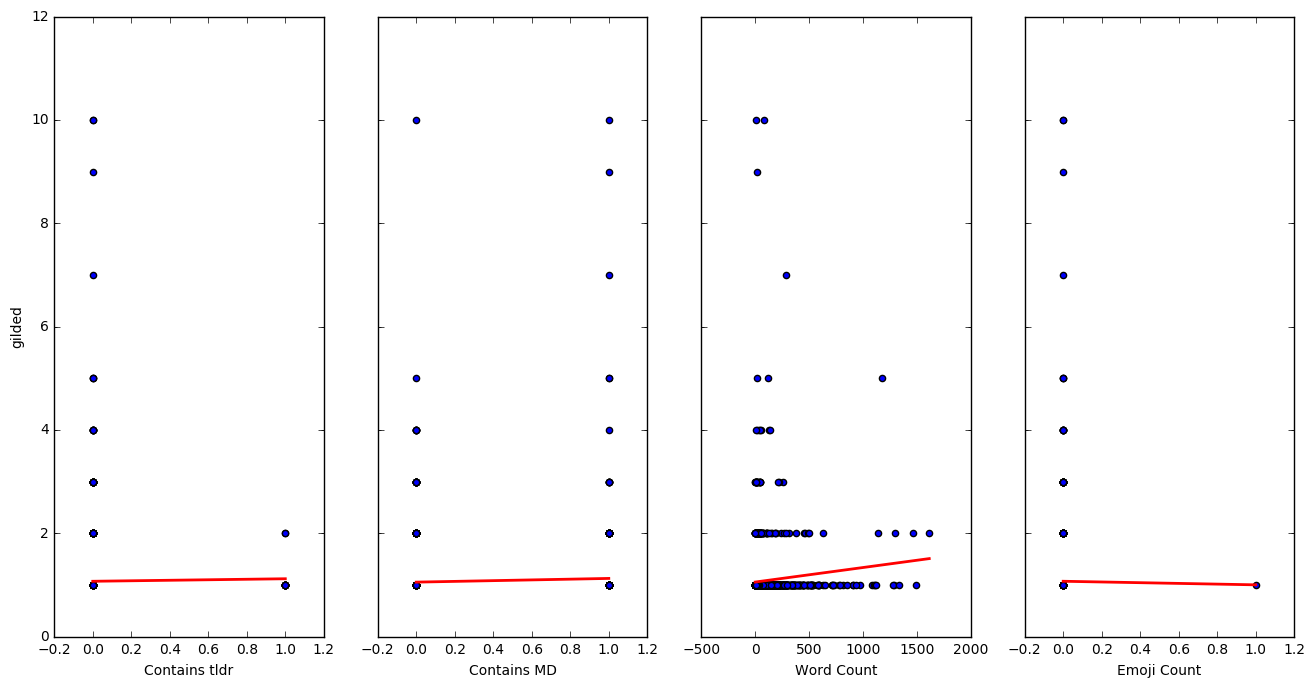

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

query = 'subreddit == "funny"'
data = data.query(query)

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True,  figsize=(16, 8))
data.plot(kind='scatter', x='Contains tldr', y='gilded', ax=axs[0])
X_new = pd.DataFrame({'Contains tldr': [data['Contains tldr'].min(), data['Contains tldr'].max()]})
lm_in_sklearn.fit(data[['Contains tldr']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[0].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Contains MD', y='gilded', ax=axs[1])
X_new = pd.DataFrame({'Contains MD': [data['Contains MD'].min(), data['Contains MD'].max()]})
lm_in_sklearn.fit(data[['Contains MD']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[1].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Word Count', y='gilded', ax=axs[2])
X_new = pd.DataFrame({'Word Count': [data['Word Count'].min(), data['Word Count'].max()]})
lm_in_sklearn.fit(data[['Word Count']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[2].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Emoji Count', y='gilded', ax=axs[3])
X_new = pd.DataFrame({'Emoji Count': [data['Emoji Count'].min(), data['Emoji Count'].max()]})
lm_in_sklearn.fit(data[['Emoji Count']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[3].plot(X_new, preds, c='red', linewidth=2)


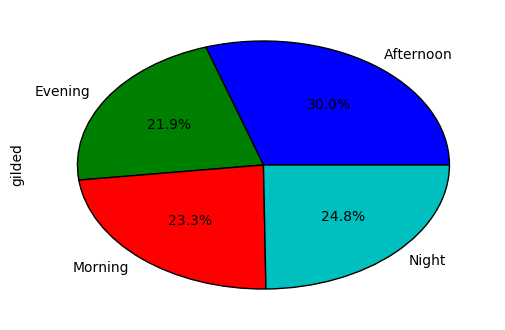

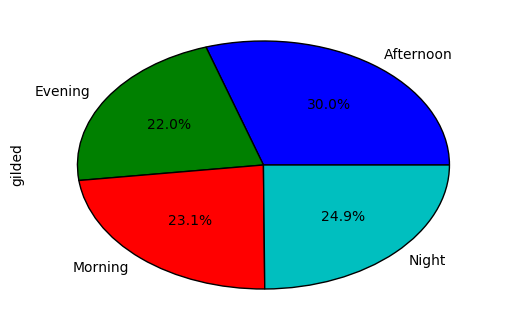

In [23]:
data.groupby('Time of Day')[['gilded']].count().plot(kind='pie',y='gilded', autopct='%1.1f%%', legend=False)

data.groupby('Time of Day')[['gilded']].sum().plot(kind='pie',y='gilded', autopct='%1.1f%%', legend=False)

In [8]:
X = data[['Word Count']]
y = data['gilded']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm_in_sklearn = LinearRegression()
lm_in_sklearn.fit(X, y)

# print intercept and coefficients
print "Intercept = ", lm_in_sklearn.intercept_
print "Coefficient = ", lm_in_sklearn.coef_

# calculate the R-squared
print 'R-squared = ', lm_in_sklearn.score(X, y)

Intercept =  1.03571120893
Coefficient =  [ 0.00027689]
R-squared =  0.0107459920164


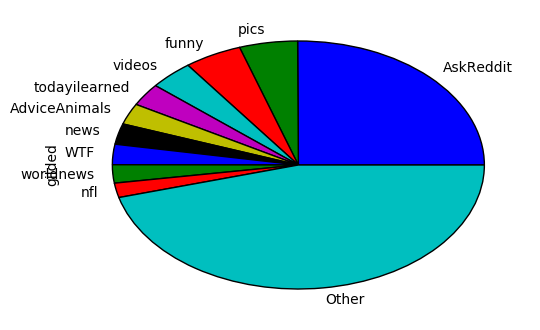

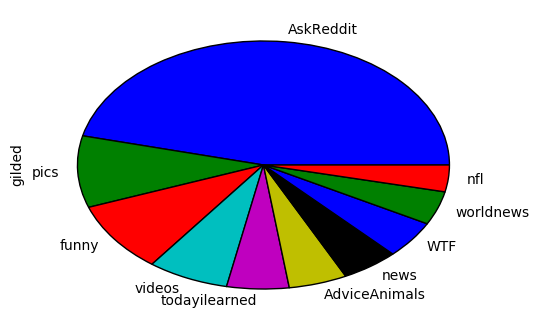

In [34]:
topsum = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=False).head(10).sum()
remaindersum = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=True).head(-10).sum()

top = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=False).head(10)
top.append(pd.DataFrame([(remaindersum-topsum)], columns=['gilded'], index=['Other'])).plot(kind='pie', y='gilded', legend=False)
top.plot(kind='pie', y='gilded', legend=False)